In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, decomposition, manifold, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, KFold, train_test_split
import random
import uproot
import glob
import math
import time
from lmfit import Model
from lmfit.models import GaussianModel, LinearModel, ExponentialModel, ConstantModel
from lmfit import Model
from ipywidgets import interact, interactive, fixed, interact_manual, Button, Layout
import ipywidgets as widgets
import warnings
warnings.filterwarnings('ignore')

In [2]:
neutron_image = np.loadtxt("neutron_image.txt")
neutron_image = neutron_image.reshape(-1,44,44)
proton_image = np.loadtxt("proton_image.txt")
proton_image = proton_image.reshape(-1,56,30)

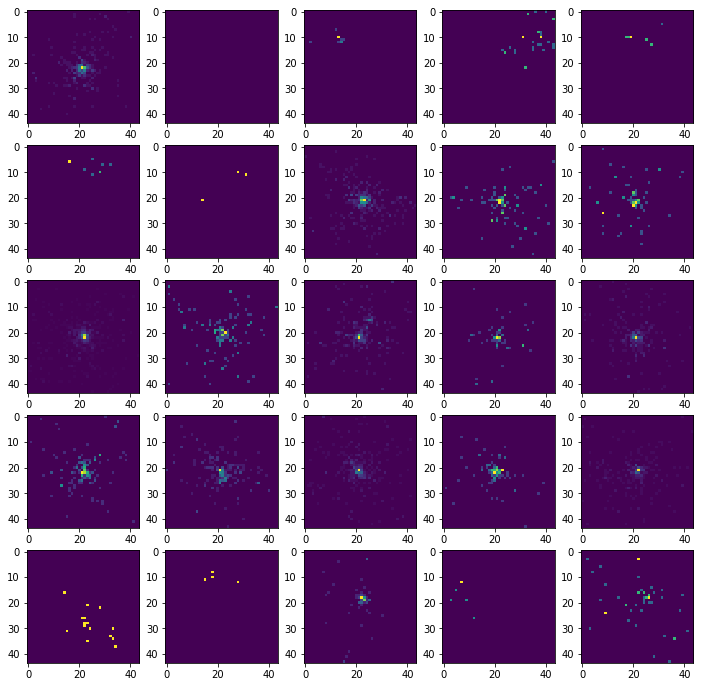

In [3]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(neutron_image[i])
plt.show()

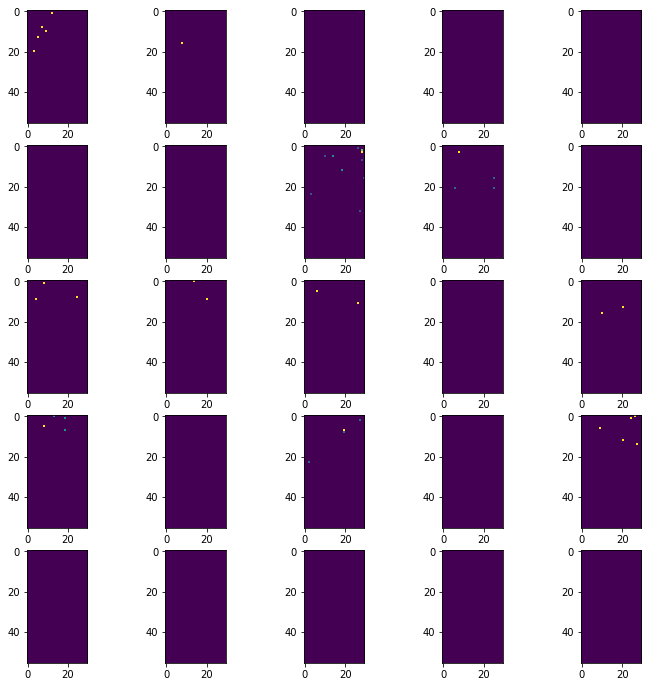

In [4]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(proton_image[i])
plt.show()

In [5]:
data = pd.read_csv('non_zero_examples.txt')

In [6]:
data['Detector0'] = np.zeros(data.shape[0])
data['Detector0'][data['Detector']=='P'] = 1
data['Detector'] = data['Detector0']
data = data.drop(columns=['Event','Counter','StatusCode','Detector0'])

In [7]:
data.head()

,Detector,Pdg,Energy,Vx,Vy,Vz,PhotonSum
0,0.0,2112,396.20700,0.025947,-0.097759,-11261.2,313
1,1.0,2112,396.20700,0.025947,-0.097759,-11261.2,5
2,0.0,-211,6.60788,18.979100,-1.395750,-11253.2,0
3,1.0,-211,6.60788,18.979100,-1.395750,-11253.2,1
4,0.0,22,13.29650,-1.580740,-1.234410,-11261.2,12


In [8]:
data.shape

(3128, 7)

In [9]:
data[data['PhotonSum']>0].shape

(2457, 7)

In [10]:
data[(data['PhotonSum']==0) * (data['Detector']==0)].shape

(56, 7)

In [11]:
data[(data['PhotonSum']==0) * (data['Detector']==1)].shape

(615, 7)